# References
## Hamm et al. 1987a, b
* Distribution and measurement of single-axon recurrent inhibitory post-synaptic potentials. Results here are used mostly for comparisons in a qualitatively manner.
* Simulations tried to reproduce Figure 5 (first paper) and Figure 2 (second paper).
* The authors could obtain a proportion of motoneuron-motor axon that could be used to define the connectivity in the pool.
* Intracellular potentials were recorded from medial gastrocnemius motoneurons.

## Uchiyama et al. (2003a)
* Synaptic swellings are indications of the strength of an $\alpha$ motoneuron's synaptic inputs to other spinal neurons. The proportions used are those reported by Cullheim and Kellerth (1978), in which FF number is ca. 1.8 the FR number and ca. 2.2 the S number.

# Parameters adjusted
* Supposedly, the probability of connections and motoneuron conductances on Renshaw cells are the only parameters to be adjusted.

# Considerations
* Stimulation of motor axons would require modifications on the code and would be a time consuming task. In order to simulate the experiments presented, stimulation were delivered to the soma of the motoneuron and this was considered to have the same effect as a single motor axon stimulation.
* Proportions cited in the work of Hamm and colleages is not explored in the simulations yet because of the lack of informations regarding distances.
* Note that the results from this simulation can change considerably according to the type of the motoneuron stimulated, i.e. size. For instance, if one chooses motoneuron 1 for stimulation, this motoneuron will not cause action potentials on nearby Renshaw cells because of its weak synaptic strength (cf. S type conductance on Renshaw cell). On the other hand, motoneuron 151 (FF type motoneuron) have enough synaptic strength to make Renshaw cells fire and then histogram will appear. This seems to be bad, but if I increase conductances and maintain the proportion as in Uchiyama et al. (2003a), the ranges get considerably bigger than experimental findings. Therefore I kept the current setting.
* Spontaneous activity of Renshaw cells were cancelled, otherwise the effect of a single recurrent inhibitory post synaptic potential could not be observed.

In [1]:
import sys
sys.path.append('Parametrizations/Population')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.interpolate import UnivariateSpline

In [148]:
simDuration_ms = 50
timeStep_ms = 0.05
t = np.arange(0, simDuration_ms, timeStep_ms)
MNi = 151
nMN = 300
nRC = 600

In [149]:
positions = []
MNsignal = np.zeros((len(t), nMN))
RCsignal = np.zeros((len(t), nRC))

filename = 'positions.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    positions.append(float(line.split()[0]))
f.close()

filename = 'MNV.dat'
f = open(filename, 'r')
lines = f.readlines()
for i, line in enumerate(lines):
    MNsignal[i,:] = np.array([float(x) for x in line.split()])
f.close()

filename = 'RCV.dat'
f = open(filename, 'r')
lines = f.readlines()
for i, line in enumerate(lines):
    RCsignal[i,:] = np.array([float(x) for x in line.split()])
f.close()

<IPython.core.display.Javascript object>


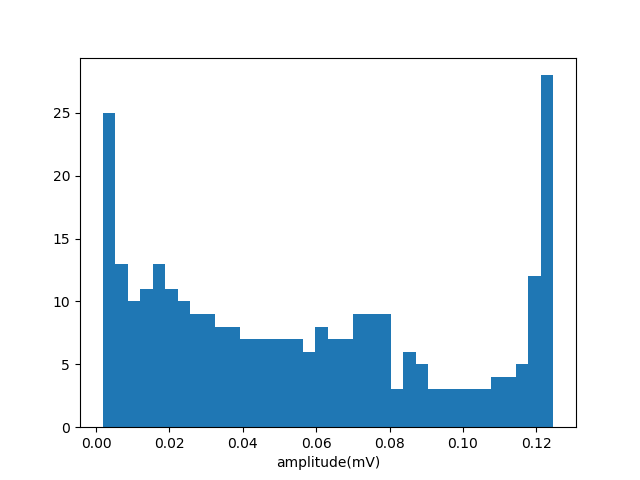

In [150]:
peaks = [abs(min(MNsignal[:,y])) for y in range(MNsignal.shape[1]) if y != MNi-1]
bins = np.linspace(min(peaks),max(peaks),len(peaks)/8)
plt.figure()
plt.hist(peaks, bins=bins)
plt.xlabel('amplitude(mV)')
plt.show()

<IPython.core.display.Javascript object>


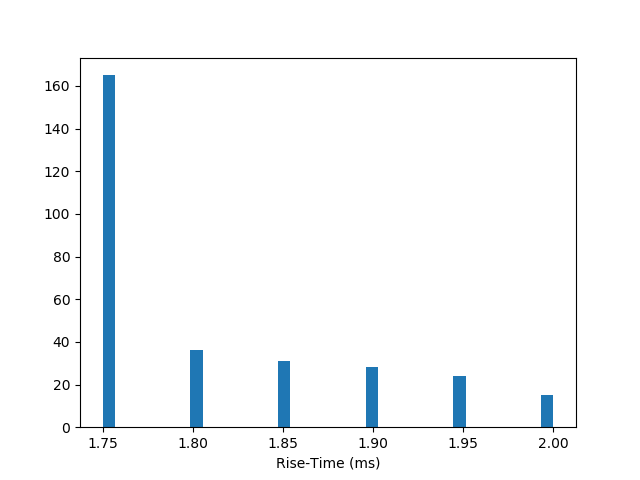

In [187]:
peaks = [min(MNsignal[:,y]) for y in range(MNsignal.shape[1])]
rise_time = []

for i in range(MNsignal.shape[1]):
    if i==MNi-1:
        continue
    for j in range(MNsignal.shape[0]):
        if MNsignal[j,i]!=0.0:
            ti = j
            tf = np.where(MNsignal[:,i]==peaks[i])[0][0]
            rise_time.append(t[tf]-t[ti])
            break
            
bins = np.linspace(min(rise_time),max(rise_time),len(rise_time)/8)
plt.figure()
plt.hist(rise_time, bins=bins)
plt.xlabel('Rise-Time (ms)')
plt.show()

<IPython.core.display.Javascript object>


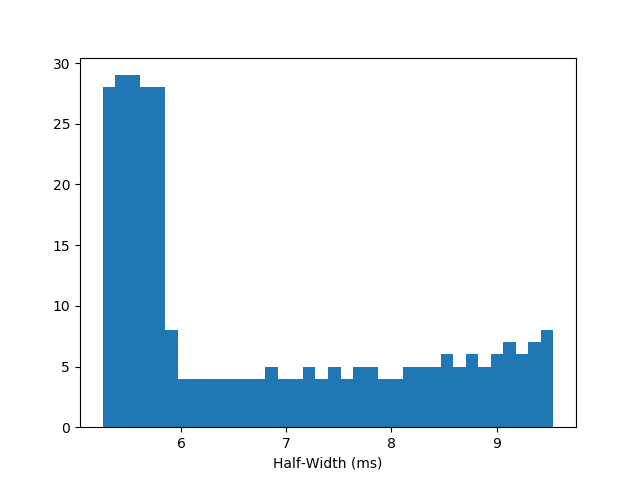

In [182]:
half_width = []

for i in range(MNsignal.shape[1]):
    if i == MNi-1:
        continue
    if min(MNsignal[:,i]) == 0:
        print 'Warning: minimum value of a MN signal equals zero'
        continue
    spline = UnivariateSpline(t, MNsignal[:,i] - min(MNsignal[:,i])/2, s=0)
    roots = spline.roots()
    if len(roots)>2:
        print 'Warning: Irregular RIPSP caused more than two roots'
        continue
    elif len(roots)<2:
        print 'Warning: Only one root at index '+str(i)
        continue
    r1, r2 = roots
    half_width.append(r2-r1)
    
bins = np.linspace(min(half_width),max(half_width),len(half_width)/8)
plt.figure()
plt.hist(half_width, bins=bins)
plt.xlabel('Half-Width (ms)')
plt.show()

<IPython.core.display.Javascript object>


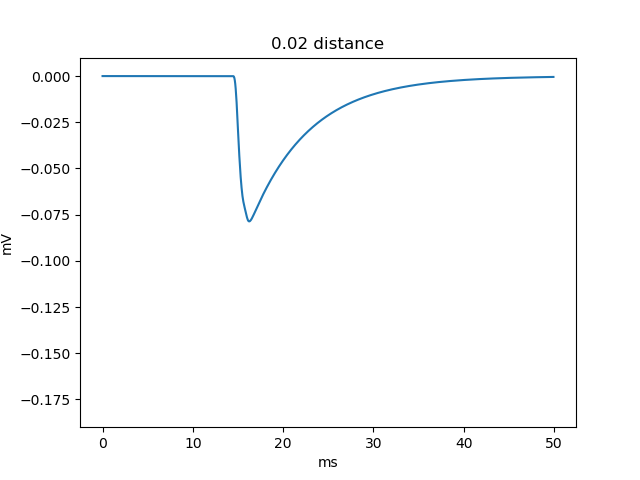

<IPython.core.display.Javascript object>


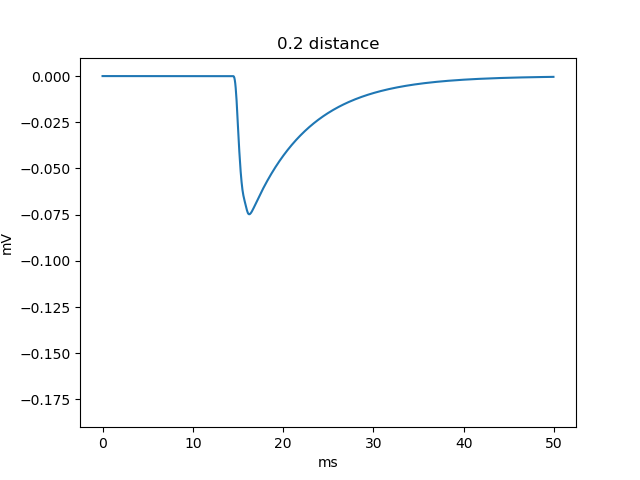

<IPython.core.display.Javascript object>


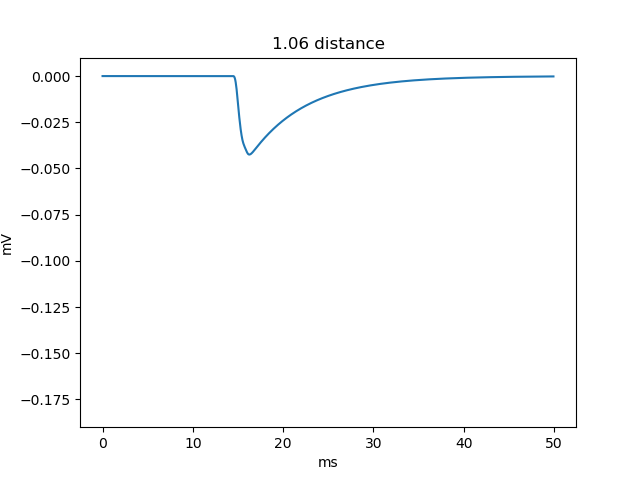

<IPython.core.display.Javascript object>


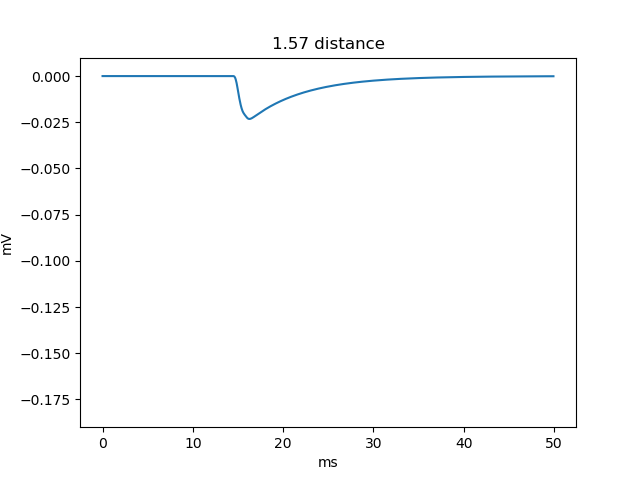

In [186]:
# According to 300 MNs divided along a 7 mm column
selectedMNs = [MNi+1, MNi+10, MNi+53, MNi+79]

for i in selectedMNs:
    plt.figure()
    plt.ylim(ymin=-0.19)#y)
    plt.ylim(ymax=0.01)
    plt.plot(t, MNsignal[:,i])
    plt.title(str(positions[i] - positions[MNi])+' distance')
    plt.xlabel('ms')
    plt.ylabel('mV')
    plt.show()